<a href="https://colab.research.google.com/github/kkewat/Computer-vision/blob/main/Shadow_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

Converting to LAB format and applying thresholding to identify the image

In [ ]:
def detect_shadows(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    cv2_imshow(lab)
    # Extract the L channel (lightness)
    l_channel = lab[:,:,0]

    # Apply thresholding to identify dark regions
    threshold = 60  # Adjust this value based on your image
    _, binary = cv2.threshold(l_channel, threshold, 255, cv2.THRESH_BINARY_INV)

    # Morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    return binary

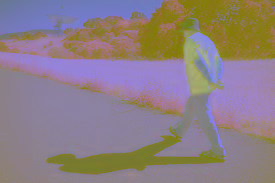

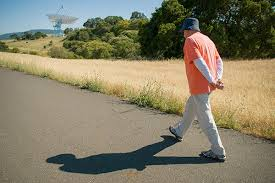

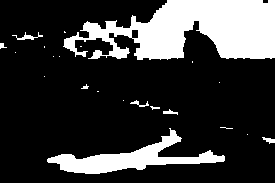

In [ ]:
# Load image
image = cv2.imread("/content/shadow.jpg")

# Detect shadows
shadow_mask = detect_shadows(image)

# Display results
cv2_imshow(image)
cv2_imshow(shadow_mask)

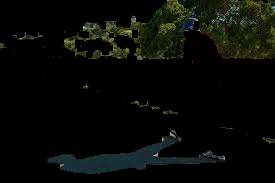

True

In [ ]:
from PIL import Image
img_copy = image
# Create a new image with the same size and mode as the RGB image
# Check if the images have the same dimensions
if img_copy.shape[:2] != shadow_mask.shape:
    raise ValueError("Images must have the same dimensions.")

# Create a new image with the same size and type as img_copy
new_image = np.zeros_like(img_copy)

# Create a mask where the shadow_mask is 255
mask = shadow_mask == 255

# Copy pixels from img_copy where the mask is True
new_image[mask] = img_copy[mask]

# Display the new image
cv2_imshow(new_image)
# Save the new image
cv2.imwrite("new_image.jpg", new_image)